In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('/content/train-chennai-sale.csv')

In [10]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [11]:
print("The number of rows:", df.shape[0])
print("The number of features:", df.shape[1])

The number of rows: 7109
The number of features: 22


In [12]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


What can we infer from the above describe function?

1. Maximum square feet is 2500 where as the minimum is 500.
2. Maximum Bedroom is 4 where as the minimum is 1.
3. Maximum number of rooms is 6 where as the minimum is 2.


DROPPING UNWANTED FEATURES

In [13]:
df = df.drop(['PRT_ID','REG_FEE','COMMIS'], axis=1)

In [14]:
print("Total number of features in the data is:",df.shape[1])

Total number of features in the data is: 19


In [15]:
categorical_features = [x for x in df.columns if not (df[x].dtype ==np.float64 or df[x].dtype==np.int64)]
print(categorical_features)

['AREA', 'DATE_SALE', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE']


In [16]:
numerical_features = [x for x in df.columns if (df[x].dtype ==np.float64 or df[x].dtype==np.int64)]
print(numerical_features)

['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE']


In [17]:
print('The data has {} categorical features'.format(len(categorical_features)))
print('The data has {} numerical features'.format(len(numerical_features)))

The data has 9 categorical features
The data has 10 numerical features


In [18]:
df.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

FILLING THE NULL VALUES

In [19]:
df['N_BEDROOM'] = df['N_BEDROOM'].fillna(df['N_BEDROOM'].mean())
df['N_BATHROOM'] = df['N_BATHROOM'].fillna(df['N_BATHROOM'].mean())
df['QS_OVERALL'] = df['QS_OVERALL'].fillna(df['QS_OVERALL'].mean())


SPELLING CORRECTIONS

In [20]:
df['PARK_FACIL'].replace(['Noo'], ['No'], inplace=True)
df['STREET'].replace(['Pavd','NoAccess'],['Paved','No Access'],inplace=True)
df['UTILITY_AVAIL'].replace(['NoSewr ','NoSeWa','All Pub'],['No Sewer','No Sewer','AllPub'],inplace=True)
df['BUILDTYPE'].replace(['Comercial','Other'],['Commercial','Others'],inplace=True)
df['SALE_COND'].replace(['Ab Normal','Partiall','PartiaLl','Adj Land'],['AbNormal','Partial','Partial','AdjLand'],inplace=True)
df['AREA'].replace(['Ana Nagar','Ann Nagar','Karapakam','Chrompt','Chrmpet','Chormpet','Adyr','Velchery','KKNagar','TNagar'],
['Anna Nagar','Anna Nagar','Karapakkam','Chrompet','Chrompet','Chrompet','Adyar','Velachery','KK Nagar','T Nagar'],
inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   object 
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7109 non-null   float64
 5   N_BATHROOM     7109 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7109 non-null   float64
 18  SALES_PR

In [22]:
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'])
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'])

In [23]:
df['BUILD_YEAR'] = df["DATE_BUILD"].dt.year
df['SALE_YEAR'] = df["DATE_SALE"].dt.year

In [24]:
df['SOLD_AGE'] = df['SALE_YEAR'] - df['BUILD_YEAR']

DROPPING THE FEATURES WHICH IS NOT IMPORTANT

In [25]:
df.drop(['DATE_SALE','DATE_BUILD'],axis=1,inplace=True)

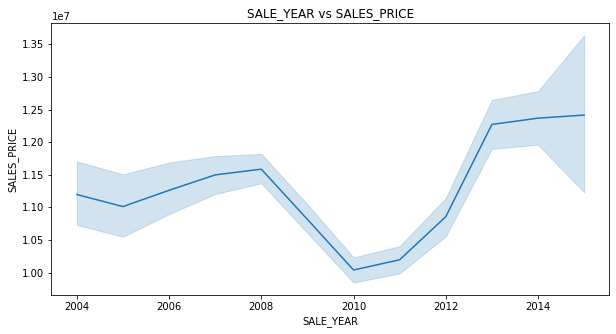

In [26]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df["SALE_YEAR"], y=df['SALES_PRICE'], data=df)
plt.title('SALE_YEAR vs SALES_PRICE')
plt.show()

In above figure, we see that the price has been in increasing trend except between 2008-2010

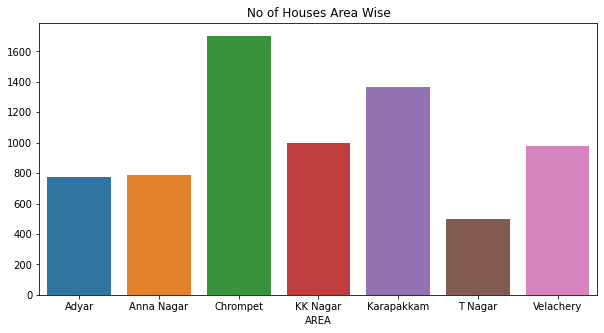

In [27]:
A=df['AREA'].groupby(df['AREA']).count()
plt.figure(figsize=(10,5))  
sns.barplot(x=A.index, y=A.values, data=df).set(title='No of Houses Area Wise')
plt.show()

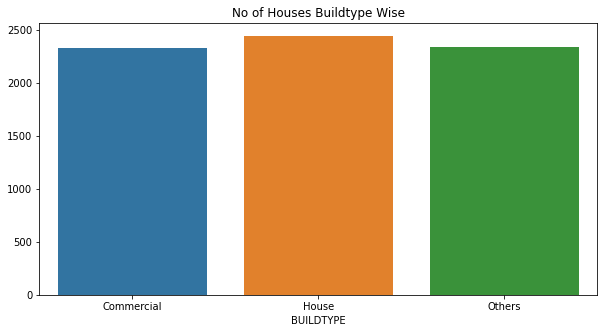

In [28]:
B=df['AREA'].groupby(df['BUILDTYPE']).count()
plt.figure(figsize=(10,5))  
sns.barplot(x=B.index, y=B.values, data=df).set(title='No of Houses Buildtype Wise')
plt.show()

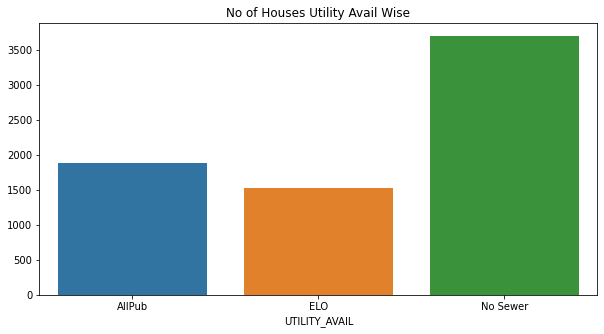

In [29]:
C=df['AREA'].groupby(df['UTILITY_AVAIL']).count()
plt.figure(figsize=(10,5))  
sns.barplot(x=C.index, y=C.values, data=df).set(title='No of Houses Utility Avail Wise')
plt.show()

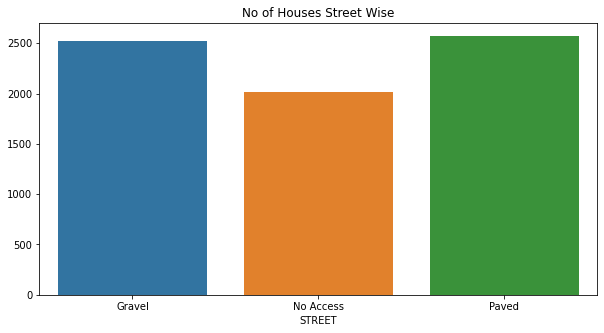

In [30]:
D=df['AREA'].groupby(df['STREET']).count()
plt.figure(figsize=(10,5))  
sns.barplot(x=D.index, y=D.values, data=df).set(title='No of Houses Street Wise')
plt.show()

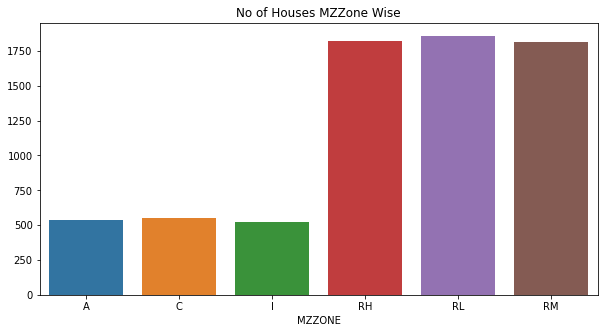

In [31]:
E = df['AREA'].groupby(df['MZZONE']).count()
plt.figure(figsize=(10,5))  
sns.barplot(x=E.index, y=E.values, data=df).set(title='No of Houses MZZone Wise')
plt.show()

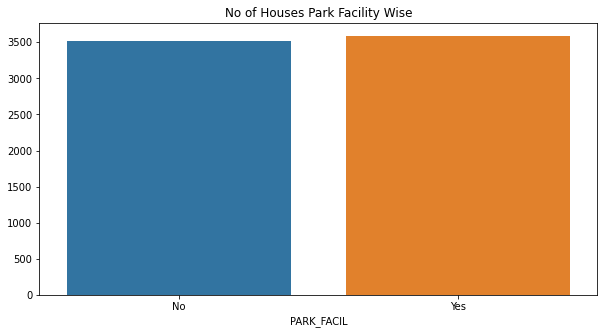

In [32]:
F = df['AREA'].groupby(df['PARK_FACIL']).count()
plt.figure(figsize=(10,5))
sns.barplot(x=F.index, y=F.values, data=df).set(title='No of Houses Park Facility Wise')
plt.show()

In [33]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'BUILD_YEAR', 'SALE_YEAR', 'SOLD_AGE'],
      dtype='object')

In [34]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILD_YEAR,SALE_YEAR,SOLD_AGE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,1967,2011,44
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,1995,2006,11
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,1992,2012,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,No Sewer,Paved,I,4.7,3.9,3.6,4.010,9630290,1988,2010,22
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,1979,2009,30


Finding is there any linear relationship between AREA vs SALES_PRICE

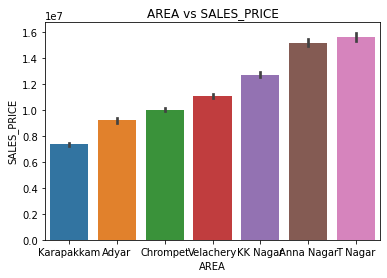

In [35]:
sns.barplot(x='AREA',y='SALES_PRICE',data=df,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.title('AREA vs SALES_PRICE')
plt.show()

Finding is there any linear relationship between BUILDTYPE vs SALES_PRICE

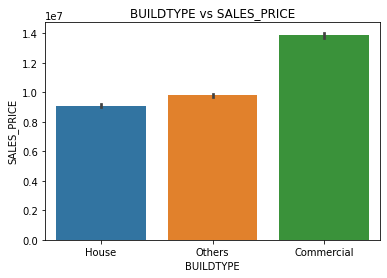

In [36]:
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df,order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.title('BUILDTYPE vs SALES_PRICE')
plt.show()

Finding is there an order in UTILITY_AVAIL vs SALES_PRICE

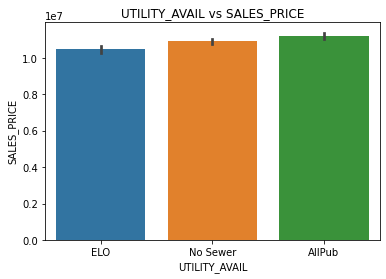

In [37]:
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df,order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.title('UTILITY_AVAIL vs SALES_PRICE')
plt.show()

Finding is there an order in MZZONE vs SALES_PRICE

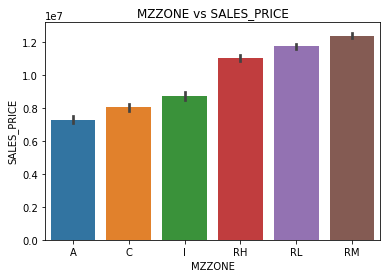

In [38]:
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df,order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title('MZZONE vs SALES_PRICE')
plt.show()

RELATION WITH TARGET VARIABLE

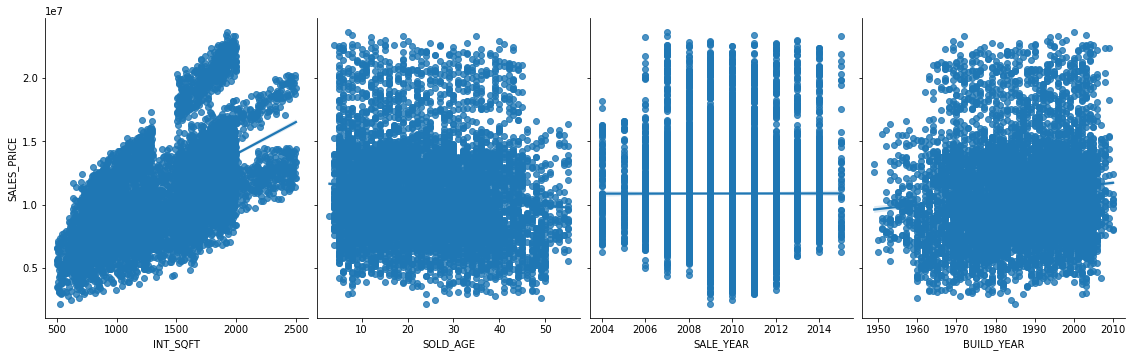

In [39]:
sns.pairplot(df,x_vars=["INT_SQFT", "SOLD_AGE","SALE_YEAR","BUILD_YEAR"], y_vars=["SALES_PRICE"],
             height=5,aspect=.8, kind="reg")
plt.show()

Only "INT_SQFT" has a clear linear relation with the target_variable('SALES_PRICE')

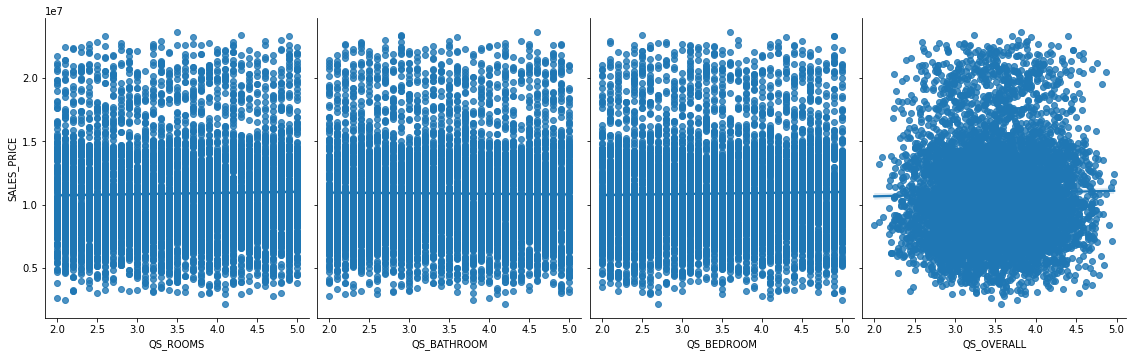

In [40]:
sns.pairplot(df,x_vars=["QS_ROOMS", "QS_BATHROOM","QS_BEDROOM","QS_OVERALL"], y_vars=["SALES_PRICE"],
             height=5, aspect=.8, kind="reg")
plt.show()

In above graph, no features has the linear relationship with the target_variable('SALES_PRICE').

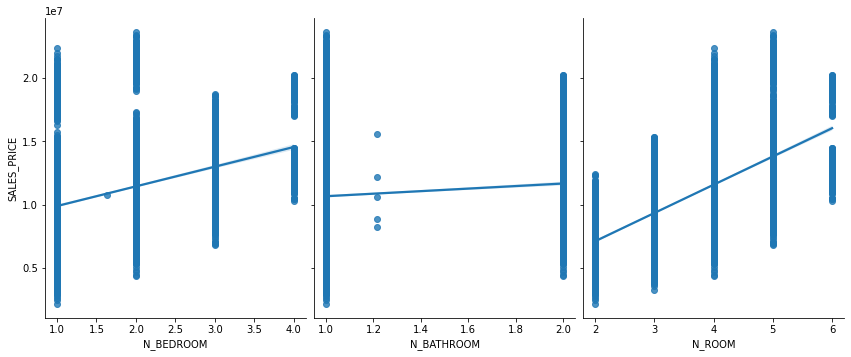

In [41]:
sns.pairplot(df, x_vars=["N_BEDROOM", "N_BATHROOM","N_ROOM"], y_vars=["SALES_PRICE"], height=5, aspect=0.8, kind='reg')
plt.show()

In above graph, N_Bathroom does not have any linear relation with the target variable (SALES_PRICE)

ENCODING THE CATEGORICAL FEATURES

In [42]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILD_YEAR,SALE_YEAR,SOLD_AGE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,1967,2011,44
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,1995,2006,11
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,1992,2012,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,No Sewer,Paved,I,4.7,3.9,3.6,4.010,9630290,1988,2010,22
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,1979,2009,30


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DIST_MAINROAD  7109 non-null   int64  
 3   N_BEDROOM      7109 non-null   float64
 4   N_BATHROOM     7109 non-null   float64
 5   N_ROOM         7109 non-null   int64  
 6   SALE_COND      7109 non-null   object 
 7   PARK_FACIL     7109 non-null   object 
 8   BUILDTYPE      7109 non-null   object 
 9   UTILITY_AVAIL  7109 non-null   object 
 10  STREET         7109 non-null   object 
 11  MZZONE         7109 non-null   object 
 12  QS_ROOMS       7109 non-null   float64
 13  QS_BATHROOM    7109 non-null   float64
 14  QS_BEDROOM     7109 non-null   float64
 15  QS_OVERALL     7109 non-null   float64
 16  SALES_PRICE    7109 non-null   int64  
 17  BUILD_YEAR     7109 non-null   int64  
 18  SALE_YEA

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [45]:
df['PARK_FACIL'] = le.fit_transform(df['PARK_FACIL'])
df['AREA'] = le.fit_transform(df['AREA'])
df['BUILDTYPE']=le.fit_transform(df['BUILDTYPE'])
df['SALE_COND']=le.fit_transform(df['SALE_COND'])
df['UTILITY_AVAIL']=le.fit_transform(df['UTILITY_AVAIL'])
df['STREET']=le.fit_transform(df['STREET'])
df['MZZONE']=le.fit_transform(df['MZZONE'])

In [46]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILD_YEAR,SALE_YEAR,SOLD_AGE
0,4,1004,131,1.0,1.0,3,0,1,0,0,2,0,4.0,3.9,4.9,4.330,7600000,1967,2011,44
1,1,1986,26,2.0,1.0,5,0,0,0,0,0,3,4.9,4.2,2.5,3.765,21717770,1995,2006,11
2,0,909,70,1.0,1.0,3,0,1,0,1,0,4,4.1,3.8,2.2,3.090,13159200,1992,2012,20
3,6,1855,14,3.0,2.0,5,2,0,2,2,2,2,4.7,3.9,3.6,4.010,9630290,1988,2010,22
4,4,1226,84,1.0,1.0,3,0,1,2,0,0,1,3.0,2.5,4.1,3.290,7406250,1979,2009,30


FEATURE IMPORTANCE

CORRELATION WITHIN THE FEATURES.

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from scipy.stats import pearsonr

In [48]:
X = df.drop(['SALES_PRICE'], axis=1)
y = df["SALES_PRICE"]

In [49]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 19), (1422, 19), (5687,), (1422,))

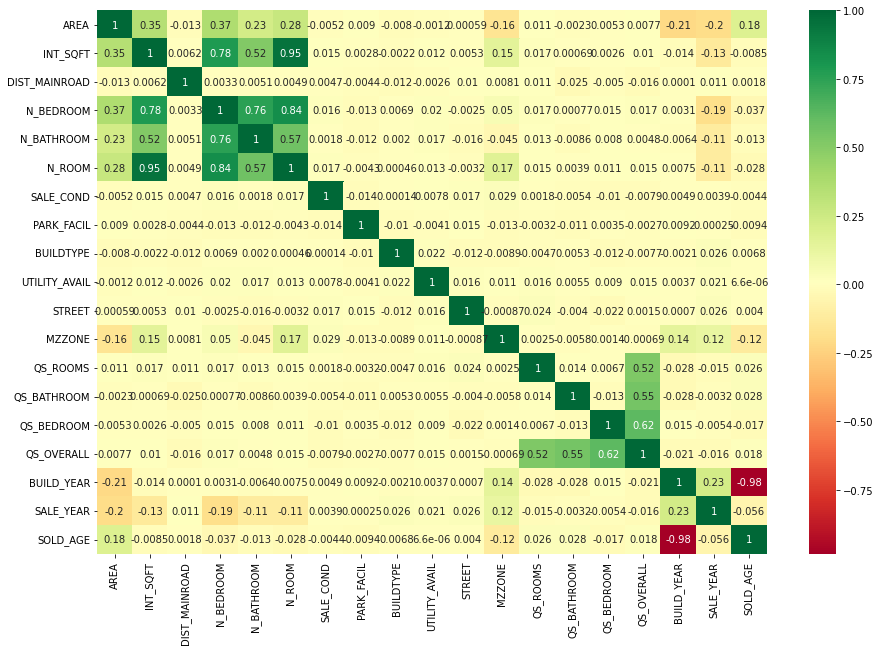

In [50]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(15,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap='RdYlGn')
plt.show()

In [51]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are use absolute() to even focus on -ve coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [52]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))
print('This column are highly correlated with another column:',corr_features)

This column are highly correlated with another column: {'N_ROOM', 'SOLD_AGE'}


In [53]:
cwf_train=X_train.drop(corr_features,axis=1)
cwf_test=X_test.drop(corr_features,axis=1)

In [54]:
cwf_train.shape
# y_train.shape

(5687, 17)

In [55]:
train = pd.concat([cwf_train,y_train],axis=1)
test = pd.concat([cwf_test,y_test],axis=1)

In [56]:
new_df=pd.concat([train,test],axis=0)
new_df.shape
print("PREVIOUSLY THE NO. OF FEATURE IS:",df.shape)
print("NOW THE NO. OF FEATURE IS:",new_df.shape)
print("{} FEATURE HAS BEEN REDUCED AFTER CORRELATION WITHIN INDEPENDENT FEATURES".format(df.shape[1]-new_df.shape[1]))

PREVIOUSLY THE NO. OF FEATURE IS: (7109, 20)
NOW THE NO. OF FEATURE IS: (7109, 18)
2 FEATURE HAS BEEN REDUCED AFTER CORRELATION WITHIN INDEPENDENT FEATURES


##CORRELATION WITH TARGET VARIABLE.

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,BUILD_YEAR,SALE_YEAR,SALES_PRICE
SALES_PRICE,-0.019138,0.612125,0.018783,0.330999,0.108865,-0.030732,0.146428,-0.436276,-0.023812,-0.042652,0.427789,0.021967,-0.011377,0.018804,0.020485,0.116043,0.000906,1.0


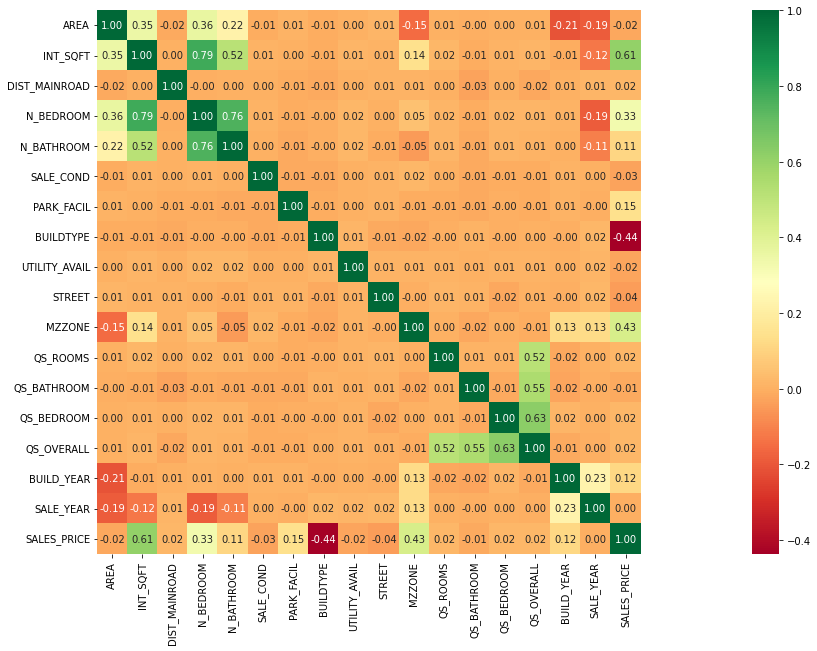

In [57]:
#correlation matrix
corrmat = new_df.corr()
plt.figure(figsize=(40, 10))
sns.heatmap(corrmat, cbar=True, fmt='.2f', annot=True, cmap='RdYlGn', square=True)
i=pd.DataFrame(new_df[new_df.columns[:]].corr()['SALES_PRICE'][:]).T
i=i.iloc[0]
pd.DataFrame(i).T

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from scipy.stats import pearsonr
scaler=StandardScaler()
minmax=MinMaxScaler()

In [59]:
X=new_df.drop(['SALES_PRICE'],axis=1)
y=new_df['SALES_PRICE']

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 17), (1422, 17), (5687,), (1422,))

In [61]:
best_features_X = SelectKBest(score_func=f_regression,k=10).fit_transform(X,y)
# print(best_features_X.scores_)

In [62]:
correlation_list=[]
for column in X.columns:
  corr_list=pearsonr(X[column],y)
  correlation_list.append([column,corr_list[0],corr_list[1]])

In [63]:
corr_df=pd.DataFrame(correlation_list,columns=['Features','Correlation','P-Value'])
corr_df.sort_values(by='P-Value',inplace=True)
corr_df.T

,1,7,10,3,6,15,4,9,5,8,11,14,0,13,2,12,16
Features,INT_SQFT,BUILDTYPE,MZZONE,N_BEDROOM,PARK_FACIL,BUILD_YEAR,N_BATHROOM,STREET,SALE_COND,UTILITY_AVAIL,QS_ROOMS,QS_OVERALL,AREA,QS_BEDROOM,DIST_MAINROAD,QS_BATHROOM,SALE_YEAR
Correlation,0.612125,-0.436276,0.427789,0.330999,0.146428,0.116043,0.108865,-0.042652,-0.030732,-0.023812,0.021967,0.020485,-0.019138,0.018804,0.018783,-0.011377,0.000906
P-Value,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000322,0.00956,0.044681,0.064015,0.084155,0.106634,0.112895,0.113289,0.337486,0.939123


In [64]:
model_training_feature1 = corr_df['Features']
model_training_feature1 = model_training_feature1.to_list()
model_training_feature = corr_df['Features']
model_training_feature = model_training_feature.to_list()
model_training_feature

['INT_SQFT',
 'BUILDTYPE',
 'MZZONE',
 'N_BEDROOM',
 'PARK_FACIL',
 'BUILD_YEAR',
 'N_BATHROOM',
 'STREET',
 'SALE_COND',
 'UTILITY_AVAIL',
 'QS_ROOMS',
 'QS_OVERALL',
 'AREA',
 'QS_BEDROOM',
 'DIST_MAINROAD',
 'QS_BATHROOM',
 'SALE_YEAR']

In [65]:
new_df = pd.DataFrame(new_df,columns=model_training_feature)
new_df=pd.concat([new_df,df['SALES_PRICE']],axis=1)

In [66]:
new_df.head(2)

,INT_SQFT,BUILDTYPE,MZZONE,N_BEDROOM,PARK_FACIL,BUILD_YEAR,N_BATHROOM,STREET,SALE_COND,UTILITY_AVAIL,QS_ROOMS,QS_OVERALL,AREA,QS_BEDROOM,DIST_MAINROAD,QS_BATHROOM,SALE_YEAR,SALES_PRICE
0,1004,0,0,1.0,1,1967,1.0,2,0,0,4.0,4.330,4,4.9,131,3.9,2011,7600000
1,1986,0,3,2.0,0,1995,1.0,0,0,0,4.9,3.765,1,2.5,26,4.2,2006,21717770


#VARIANCE INFLATION FACTOR.

In [67]:
X=new_df.drop(['SALES_PRICE'],axis=1)
y=new_df['SALES_PRICE']

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 17), (1422, 17), (5687,), (1422,))

This measures the multi-colinearity. If it is more than 5, then we should investigate our features.

Multicollinearity - is the occurrence of high intercorrelations among two or more independent variables in a multiple regression model. ... In general, multicollinearity can lead to wider confidence intervals that produce less reliable probabilities in terms of the effect of independent variables in a model

In [69]:
#if VIF is more than 4 then we have change the feature. 
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
r2=lr_model.score(X_train,y_train)
vif=1/(1-r2)
vif

4.578294391575492

###MACHINE LEARNING MODEL

In [70]:
df=new_df

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
scaler=StandardScaler()
minmax=MinMaxScaler()

In [72]:
X=new_df.drop('SALES_PRICE',axis=1)
y=df['SALES_PRICE']

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 17), (1422, 17), (5687,), (1422,))

In [74]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###1st MODEL IS LINEAR REGRESSION.

In [75]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()

In [76]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [77]:
lr_y_pred=lr_model.predict(X_test)

In [78]:
print(r2_score(y_test,lr_y_pred))

0.773859443043175


##2nd MODEL IS XGBOOST.

In [79]:
import xgboost as xg
# xg_model = XGBRegressor()
xg_model= xg.XGBRegressor(colsample_bytree=0.4,
                 gamma=2,                 
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                )

In [80]:
xg_model.fit(X_train_scaled,y_train)

[04:42:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.4, gamma=2, learning_rate=0.01, max_depth=4,
             min_child_weight=1.5, n_estimators=10000)

In [81]:
xg_y_pred=xg_model.predict(X_test_scaled)

In [82]:
print("XGBoost model Rsquared metric:",r2_score(y_test,xg_y_pred))

XGBoost model Rsquared metric: 0.9989292966644897


##3rd MODEL IS RANDOM FOREST.

In [83]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators= 1000, max_depth = 4, max_features='sqrt')

rf.fit(X_train, y_train);

rf_pred = rf.predict(X_test)

In [84]:
print("Random forest Regressor model Rsquared metric",r2_score(y_test,rf_pred))

Random forest Regressor model Rsquared metric 0.7785645375553778


##4th MODEL IS ENSEMBLE TECHNIQUE.

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xg

model1 = LinearRegression()
model2 = RandomForestRegressor(random_state=1)
model3 = GradientBoostingRegressor(random_state=1)
model4 = DecisionTreeRegressor(random_state=1)

model = VotingRegressor(estimators=[('Linear_Regg', model1), ('Random_Forest', model2), ('Gradient_Boosting', model3)])
model.fit(X_train,y_train)
et_y_pred=model.predict(X_test)
print("Ensemble Technique Rsquared metric",r2_score(y_test,et_y_pred))

Ensemble Technique Rsquared metric 0.9581221366592121


##BEST MODEL:

My XGBoost model give me the high accuracy which is close to 1..
Followed by Ensemble Technique, RandomForest Regressor and Linear Regression.

In [86]:
print("XGBoost model Rsquared metric:",r2_score(y_test,xg_y_pred))
print("Ensemble Technique Rsquared metric:",r2_score(y_test,et_y_pred))
print("Random forest Regressor model Rsquared metric:",r2_score(y_test,rf_pred))
print("Linear Regg model Rsquared metric:",r2_score(y_test,lr_y_pred))

XGBoost model Rsquared metric: 0.9989292966644897
Ensemble Technique Rsquared metric: 0.9581221366592121
Random forest Regressor model Rsquared metric: 0.7785645375553778
Linear Regg model Rsquared metric: 0.773859443043175


CONCLUSION:

1. If any agent want to build any type of building in Chennai, I would suggest him to build a "Commercial" building.
2. When it comes to the location, I would suggest him "T Nagar", as the first choice because the 'average/minimum/maximum sales_price' of "T Nagar" is higher than other Area.
3. I would suggest the agent to build with the "Parking facility" and with "All_Utility" .
4. I will strongly suggest not to construct any type of building which has no access to the building.